## Intro

This is a supervised classification algorithm based on the idea that histograms are kind of like an approximation of the probability density function for a random variable.

The main benifet of this approach is that the learning process should extremely parallelizable, so it should scale quite well to large data sets.

### Learning Process
* $H_+ = $ histogram for positive datapoints
* $H_- = $ histogram for negative datapoints
* $H = H_+ - H_- = $ activation function. spans [-1,1]

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import time

In [2]:
def shuffle(x,y):
    z = list(zip(x,y))
    np.random.shuffle(z)
    x,y = zip(*z)
    return np.array(x),np.array(y)

def split(x,y,split_percentage):
    split_idx = int(len(y)*split_percentage)
    z = list(zip(x,y))
    z1 = z[:split_idx]
    z2 = z[split_idx:]
    x1,y1 = zip(*z1)
    x2,y2 = zip(*z2)
    return np.array(x1),np.array(y1),np.array(x2),np.array(y2)

### The Data

We'll start off looking at two small, nicely separated, gaussian distributions

In [3]:
p_size = 50
n_size = 50


p_data = np.random.normal((1,2), (1,1), (p_size,2))
n_data = np.random.normal((8,-1), (1,1), (n_size,2))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)

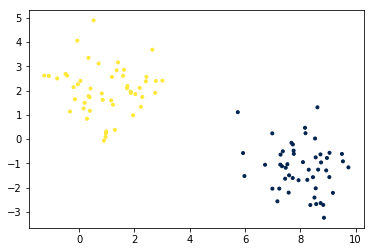

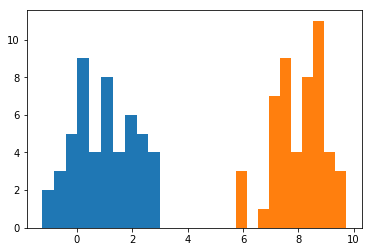

In [4]:
plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
plt.show()
plt.hist(p_data[:,0])
plt.hist(n_data[:,0])
plt.show()

### Basic Inspiration
The two histograms above (blue and orange) can be thought of as un-normalized pdfs for the two clusters. For this explanation we are going to ignore the y dimension. The basic argument this model is making is that the probability of being a member of the blue distribution is greatest when the likelyhood of being in A is greatest and the likelyhood of being in B is lowest.

The simplest activation function upholding this argument is the $O(x) = L(A|x) - L(B|x)$.

Below is a plot of the activation function for the x coordinate of the data we made above

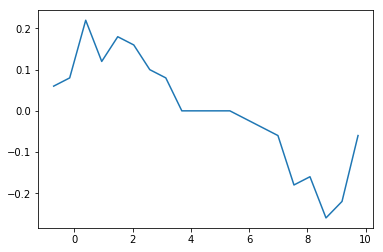

In [5]:
x = data[:,0]

h_p, b_p = np.histogram(p_data[:,0],20,range=(x.min(),x.max()))
h_p = h_p/p_data.shape[0]
h_n, b_n = np.histogram(n_data[:,0],20,range=(x.min(),x.max()))
h_n = h_n/n_data.shape[0]
h = h_p - h_n
plt.plot(b_p[1:],h)
plt.show()

In [6]:
class Naive:
    def __init__(self):
        self.params = []
    def fit_1d(self,x,y,bins = 20, show_hist = False):
        positive_idxs = np.where(y==1)[0]
        negative_idxs = np.where(y==0)[0]
        x_p = x[positive_idxs]
        x_n = x[negative_idxs]
        h_p, b_p = np.histogram(x_p,bins,range=(x.min(),x.max()))
        h_p = h_p/x_p.shape[0]
        h_n, b_n = np.histogram(x_n,bins,range=(x.min(),x.max()))
        h_n = h_n/x_n.shape[0]
        h = h_p - h_n
        if show_hist:
            plt.plot(b_n[1:],h)
        return h,b_n[1:]
    
    def predict_1d(self,x,d):
        h,bins = self.params[d]
        return np.interp(x,bins,h)
    
    def fit(self, x, y, b = 20):
        for i in range(x.shape[1]):
            self.params.append(self.fit_1d(x[:,i], y, b))
    def predict(self, x, give_probs = False):
        probs = []
        for i in range(x.shape[1]):
            probs.append(self.predict_1d(x[:,i],i))
        probs = np.array(probs).T
        if give_probs:
            return ((probs.sum(1)/x.shape[1])+1)/2
        return ((probs.sum(1)/x.shape[1])>0).astype(int)
            


Accuracy: 1.0


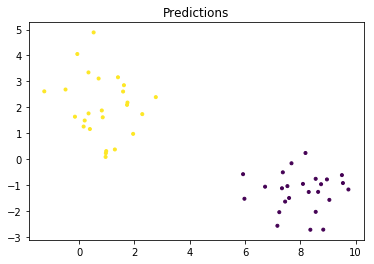

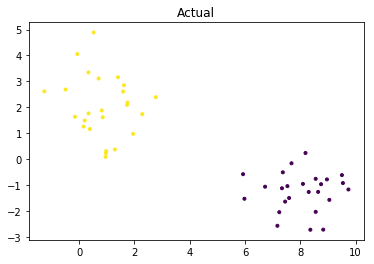

In [7]:
x_train, y_train, x_test, y_test = split(data,labels,0.5)

model = Naive()
model.fit(x_train,y_train)



y_predict = model.predict(x_test)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()



## Ok, now lets see how this model performs for more interesting distributions

### Same distribution as above but with more data

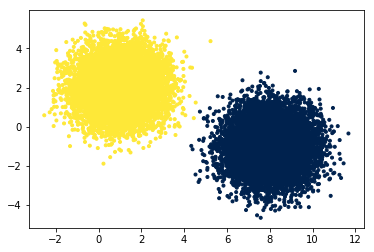

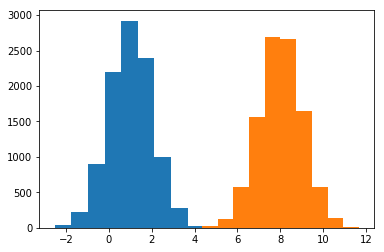

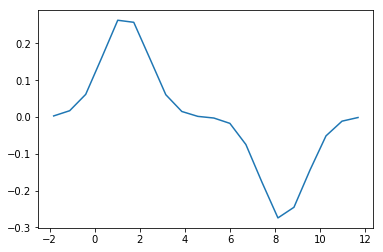

Accuracy: 0.99


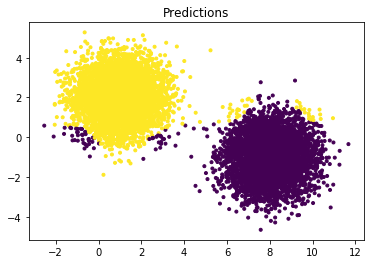

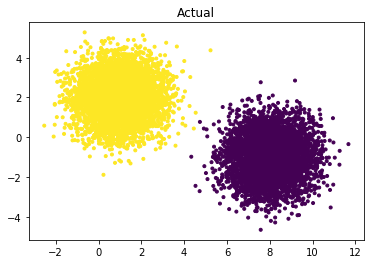

In [8]:
p_size = 10000
n_size = 10000


p_data = np.random.normal((1,2), (1,1), (p_size,2))
n_data = np.random.normal((8,-1), (1,1), (n_size,2))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)

plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
plt.show()
plt.hist(p_data[:,0])
plt.hist(n_data[:,0])
plt.show()

x = data[:,0]

h_p, b_p = np.histogram(p_data[:,0],20,range=(x.min(),x.max()))
h_p = h_p/p_data.shape[0]
h_n, b_n = np.histogram(n_data[:,0],20,range=(x.min(),x.max()))
h_n = h_n/n_data.shape[0]
h = h_p - h_n
plt.plot(b_p[1:],h)
plt.show()

x_train, y_train, x_test, y_test = split(data,labels,0.5)

model = Naive()
model.fit(x_train,y_train, 50)



y_predict = model.predict(x_test)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()


### Disproportionate occurances

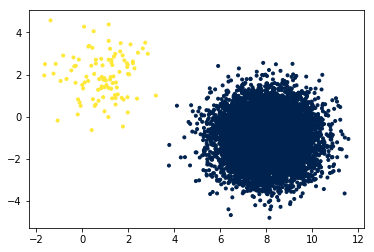

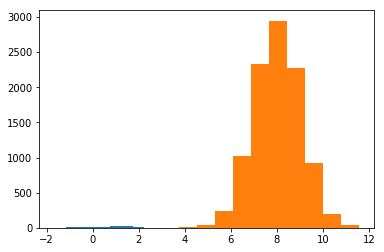

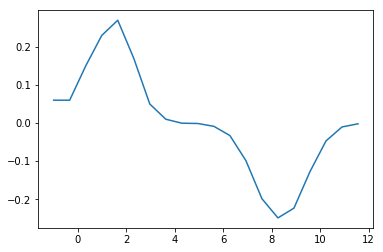

Accuracy: 0.9912871287128713


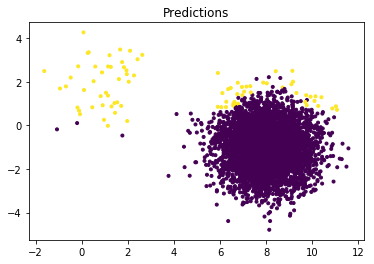

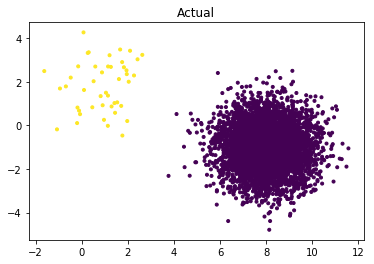

In [9]:
p_size = 100
n_size = 10000


p_data = np.random.normal((1,2), (1,1), (p_size,2))
n_data = np.random.normal((8,-1), (1,1), (n_size,2))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)

plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
plt.show()
plt.hist(p_data[:,0])
plt.hist(n_data[:,0])
plt.show()

x = data[:,0]

h_p, b_p = np.histogram(p_data[:,0],20,range=(x.min(),x.max()))
h_p = h_p/p_data.shape[0]
h_n, b_n = np.histogram(n_data[:,0],20,range=(x.min(),x.max()))
h_n = h_n/n_data.shape[0]
h = h_p - h_n
plt.plot(b_p[1:],h)
plt.show()

x_train, y_train, x_test, y_test = split(data,labels,0.5)

model = Naive()
model.fit(x_train,y_train, 50)



y_predict = model.predict(x_test)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()


### Overlapping in one dimension

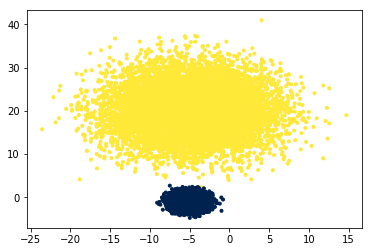

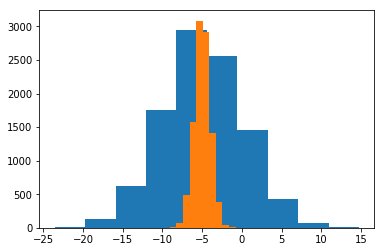

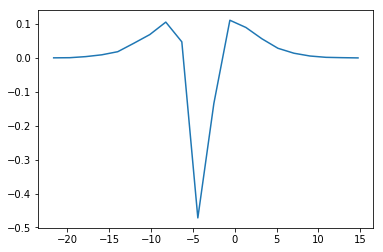

Accuracy: 0.8868


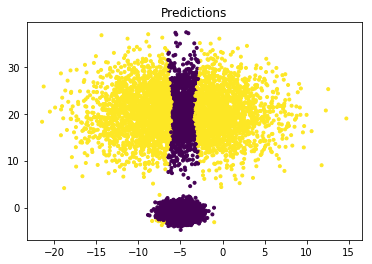

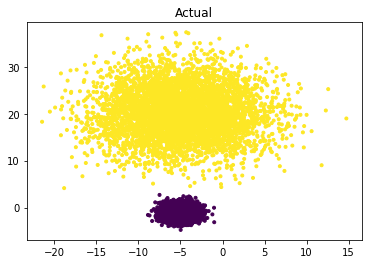

In [10]:
p_size = 10000
n_size = 10000


p_data = np.random.normal((-5,20), (5,5), (p_size,2))
n_data = np.random.normal((-5,-1), (1,1), (n_size,2))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)

plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
plt.show()
plt.hist(p_data[:,0])
plt.hist(n_data[:,0])
plt.show()

x = data[:,0]

h_p, b_p = np.histogram(p_data[:,0],20,range=(x.min(),x.max()))
h_p = h_p/p_data.shape[0]
h_n, b_n = np.histogram(n_data[:,0],20,range=(x.min(),x.max()))
h_n = h_n/n_data.shape[0]
h = h_p - h_n
plt.plot(b_p[1:],h)
plt.show()

x_train, y_train, x_test, y_test = split(data,labels,0.5)

model = Naive()
model.fit(x_train,y_train, 50)



y_predict = model.predict(x_test)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

### Overlapping

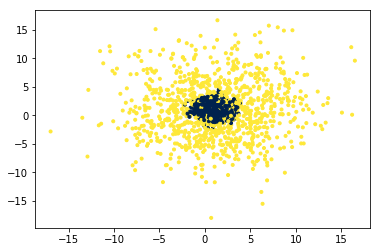

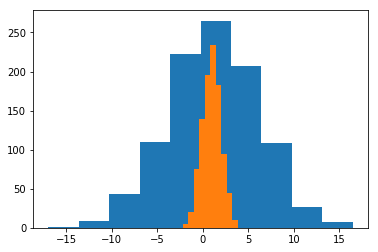

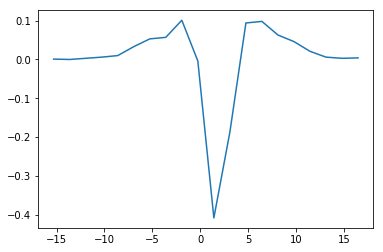

Accuracy: 0.762


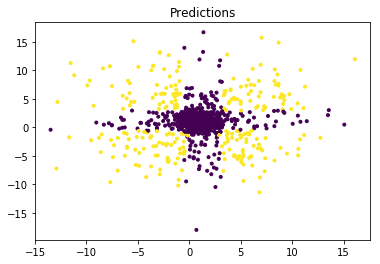

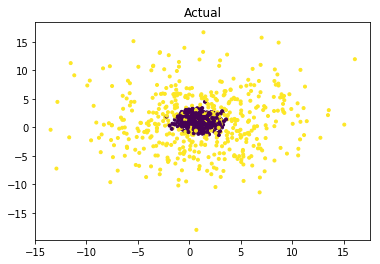

In [11]:
p_size = 1000
n_size = 1000


p_data = np.random.normal((1,1), (5,5), (p_size,2))
n_data = np.random.normal((1,1), (1,1), (n_size,2))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)

plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
plt.show()
plt.hist(p_data[:,0])
plt.hist(n_data[:,0])
plt.show()

x = data[:,0]

h_p, b_p = np.histogram(p_data[:,0],20,range=(x.min(),x.max()))
h_p = h_p/p_data.shape[0]
h_n, b_n = np.histogram(n_data[:,0],20,range=(x.min(),x.max()))
h_n = h_n/n_data.shape[0]
h = h_p - h_n
plt.plot(b_p[1:],h)
plt.show()

x_train, y_train, x_test, y_test = split(data,labels,0.5)

model = Naive()
model.fit(x_train,y_train, 50)



y_predict = model.predict(x_test)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

### Large dataset (2 Million datapoints)

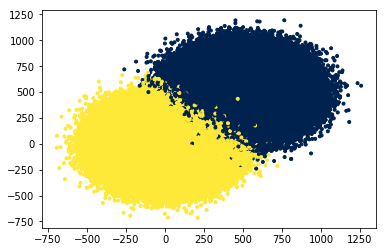

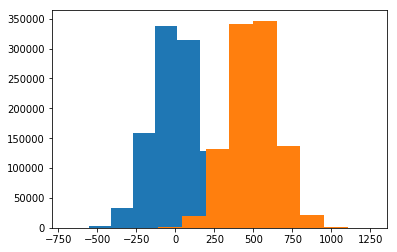

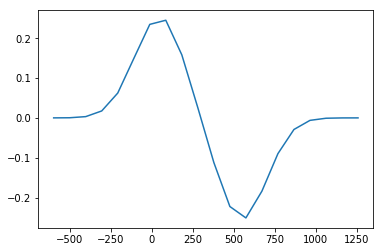

Time to train: 0.060050249099731445
Time to predict: 0.08188128471374512
Accuracy: 0.981989


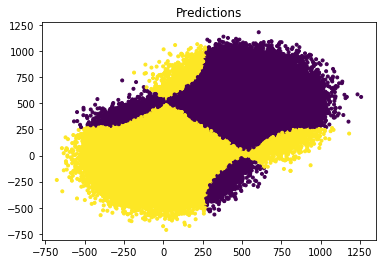

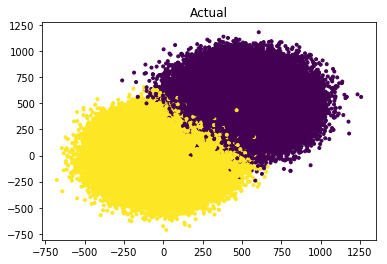

In [12]:
p_size = 1000000
n_size = 1000000


p_data = np.random.normal((1,1), (150,150), (p_size,2))
n_data = np.random.normal((500,500), (150,150), (n_size,2))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)

plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
plt.show()
plt.hist(p_data[:,0])
plt.hist(n_data[:,0])
plt.show()

x = data[:,0]

h_p, b_p = np.histogram(p_data[:,0],20,range=(x.min(),x.max()))
h_p = h_p/p_data.shape[0]
h_n, b_n = np.histogram(n_data[:,0],20,range=(x.min(),x.max()))
h_n = h_n/n_data.shape[0]
h = h_p - h_n
plt.plot(b_p[1:],h)
plt.show()

x_train, y_train, x_test, y_test = split(data,labels,0.5)

t0 = time.time()
model = Naive()
model.fit(x_train,y_train, 50)
tf = time.time()

print("Time to train:",tf-t0)
y_predict = model.predict(x_test)
tp = time.time()
print("Time to predict:",tp-tf)


print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

Time to train: 0.18271470069885254
Time to predict: 0.13358044624328613
Accuracy: 0.990735


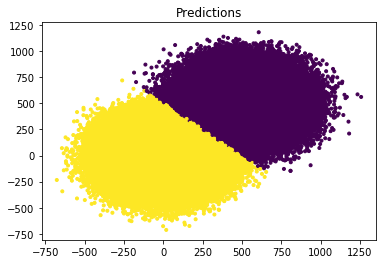

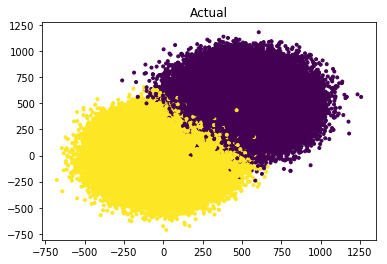

In [13]:

model = GaussianNB()

t0 = time.time()
model.fit(x_train,y_train)
tf = time.time()

print("Time to train:",tf-t0)
y_predict = model.predict(x_test)
tp = time.time()
print("Time to predict:",tp-tf)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

### Higher Dimensions

Gaussian Naive Bayes pulls ahead on high dimensional data.
200,000 datapoints with 1,000 dimension

But we also see that the addition of more dimensions reduces the strange behavior seen in the 2D examples

Time to train: 11.256916284561157
Time to predict: 5.562304496765137
Accuracy: 1.0


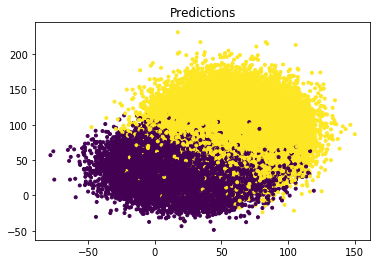

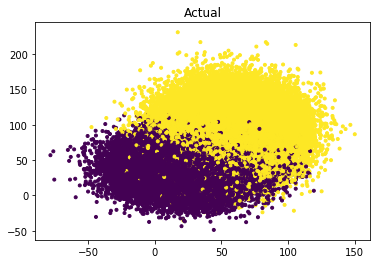

In [14]:
a = np.random.randint(100, size = 1000)
b = np.random.randint(100, size = 1000)
c = np.random.randint(50, size = 1000)
d = np.random.randint(50, size = 1000)


p_size = 100000
n_size = 100000


p_data = np.random.normal(a, c, (p_size,1000))
n_data = np.random.normal(b, d, (n_size,1000))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)


x_train, y_train, x_test, y_test = split(data,labels,0.5)

t0 = time.time()
model = Naive()
model.fit(x_train,y_train, 50)
tf = time.time()

print("Time to train:",tf-t0)
y_predict = model.predict(x_test)
tp = time.time()
print("Time to predict:",tp-tf)


print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

Time to train: 1.6640794277191162
Time to predict: 1.7065505981445312
Accuracy: 1.0


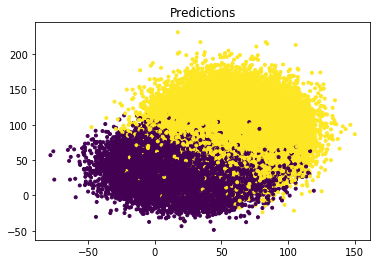

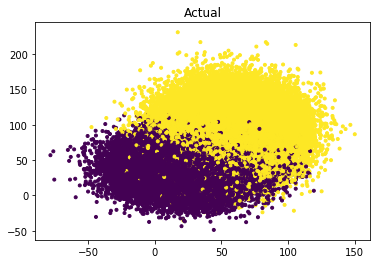

In [15]:
model = GaussianNB()

t0 = time.time()
model.fit(x_train,y_train)
tf = time.time()

print("Time to train:",tf-t0)
y_predict = model.predict(x_test)
tp = time.time()
print("Time to predict:",tp-tf)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

Time to train: 0.054758548736572266
Time to predict: 0.03928565979003906
Accuracy: 0.94746


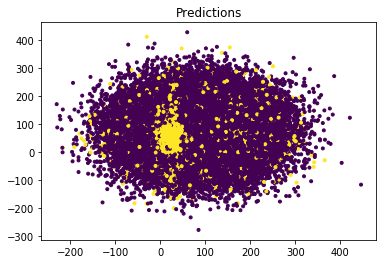

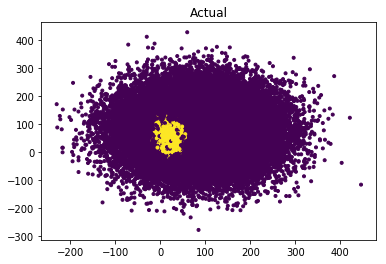

In [40]:
a = np.random.randint(100, size = 10)
b = np.random.randint(100, size = 10)
c = np.random.randint(10, size = 10)*10
d = np.random.randint(10, size = 10)*10


p_size = 100000
n_size = 100000


p_data = np.random.normal(a, c, (p_size,10))
n_data = np.random.normal(b, d, (n_size,10))
labels = np.array([1]*p_size+[0]*n_size)

data = np.vstack((p_data,n_data))
data,labels = shuffle(data,labels)


x_train, y_train, x_test, y_test = split(data,labels,0.5)

t0 = time.time()
model = Naive()
model.fit(x_train,y_train, 50)
tf = time.time()

print("Time to train:",tf-t0)
y_predict = model.predict(x_test)
tp = time.time()
print("Time to predict:",tp-tf)


print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()

Time to train: 0.030787229537963867
Time to predict: 0.021408796310424805
Accuracy: 1.0


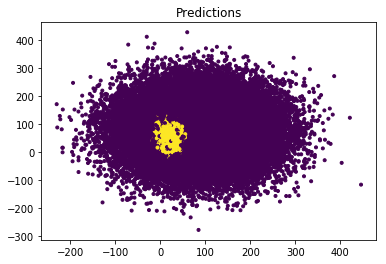

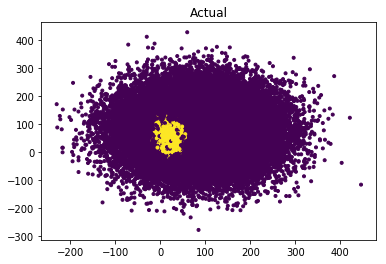

In [41]:
model = GaussianNB()

t0 = time.time()
model.fit(x_train,y_train)
tf = time.time()

print("Time to train:",tf-t0)
y_predict = model.predict(x_test)
tp = time.time()
print("Time to predict:",tp-tf)

print("Accuracy:", (y_predict == y_test).mean())
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict,marker = '.')
plt.title("Predictions")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, marker = '.')
plt.title("Actual")
plt.show()